In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [125]:
class Put():
    def __init__(self, pos, strike_price, option_price, current_stock_price):
        self.pos = pos
        self.strike_price = strike_price
        self.option_price = option_price
        self.current_stock_price = current_stock_price
        self.payoff = 0
        self.profit = 0
        self.arr_current_stock_price = np.arange(self.current_stock_price - 20, self.current_stock_price + 20, 0.5)
        self.payoff_arr = []
        self.profit_arr = []

    def payOff(self):
      if self.pos == 'long':
        self.payoff = max(0, (self.strike_price - self.current_stock_price))
      else:
        self.payoff = min(0, (self.current_stock_price - self.strike_price))
      return self.payoff
  
    def proFit(self):
      pay = self.payOff()
      if self.pos == 'long':
        self.profit = pay - self.option_price
      else:
        self.profit = pay + self.option_price
      return self.profit

    def payOff_Arr(self):
      if self.pos == 'long':
        for i in self.arr_current_stock_price:
           self.payoff_arr.append(max(0, (self.strike_price - i)))
      else:
        for i in self.arr_current_stock_price:
           self.payoff_arr.append(min(0, (i - self.strike_price)))
      return np.array(self.payoff_arr)


    def proFit_Arr(self):
      if self.pos == 'long':
        self.profit_arr = np.array(self.payoff_arr) - self.option_price
      else:
        self.profit_arr = np.array(self.payoff_arr) + self.option_price
      return self.profit_arr

    def fit(self):
      temp1 = self.payOff()
      print('payOff : {}'.format(temp1))
      temp2 = self.proFit()
      print('profit : {}'.format(temp2))
      temp3 = self.payOff_Arr()
      temp4 = self.proFit_Arr()
      df = pd.DataFrame(np.array(temp3), columns=['Payoff'])
      df['profit'] = temp4
      df['stock_price'] = self.arr_current_stock_price
      return df

      

In [126]:
class Call():
    def __init__(self, pos, strike_price, option_price, current_stock_price):
        self.pos = pos
        self.strike_price = strike_price
        self.option_price = option_price
        self.current_stock_price = current_stock_price
        self.payoff = 0
        self.profit = 0
        self.arr_current_stock_price = np.arange(self.current_stock_price - 20, self.current_stock_price + 20, 0.5)
        self.payoff_arr = []
        self.profit_arr = []

    def payOff(self):
      if self.pos == 'long':
        self.payoff = max(0, (self.current_stock_price - self.strike_price))
      else:
        self.payoff = min(0, (self.strike_price - self.current_stock_price))
      return self.payoff
  
    def proFit(self):
      pay = self.payOff()
      if self.pos == 'long':
        self.profit = pay - self.option_price
      else:
        self.profit = pay + self.option_price
      return self.profit

    def payOff_Arr(self):
      if self.pos == 'long':
        for i in self.arr_current_stock_price:
           self.payoff_arr.append(max(0, (i - self.strike_price)))
      else:
        for i in self.arr_current_stock_price:
           self.payoff_arr.append(min(0, (self.strike_price - i)))
      return np.array(self.payoff_arr)


    def proFit_Arr(self):
      if self.pos == 'long':
        self.profit_arr = np.array(self.payoff_arr) - self.option_price
      else:
        self.profit_arr = np.array(self.payoff_arr) + self.option_price
      return self.profit_arr

    def fit(self):
      temp1 = self.payOff()
      print('payOff : {}'.format(temp1))
      temp2 = self.proFit()
      print('profit : {}'.format(temp2))
      temp3 = self.payOff_Arr()
      temp4 = self.proFit_Arr()
      df = pd.DataFrame(np.array(temp3), columns=['Payoff'])
      df['profit'] = temp4
      df['stock_price'] = self.arr_current_stock_price
      return df

     

In [152]:
x = Put('long', 40, 3, 30)
y = Put('short', 35, 1, 30)

In [153]:
a = x.fit()
b = y.fit()

payOff : 10
profit : 7
payOff : -5
profit : -4


In [154]:
a['b_profit'] = b['profit']

In [155]:
a['total_pro'] = a['b_profit'] + a['profit']

In [156]:
a = a.set_index('stock_price')

In [157]:
a

,Payoff,profit,b_profit,total_pro
stock_price,,,,
10.0,30.0,27.0,-24.0,3.0
10.5,29.5,26.5,-23.5,3.0
11.0,29.0,26.0,-23.0,3.0
11.5,28.5,25.5,-22.5,3.0
12.0,28.0,25.0,-22.0,3.0
...,...,...,...,...
47.5,0.0,-3.0,1.0,-2.0
48.0,0.0,-3.0,1.0,-2.0
48.5,0.0,-3.0,1.0,-2.0


In [158]:
a.T

stock_price,10.0,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5,20.0,20.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,24.5,25.0,25.5,26.0,26.5,27.0,27.5,28.0,28.5,29.0,29.5,30.0,30.5,31.0,31.5,32.0,32.5,33.0,33.5,34.0,34.5,35.0,35.5,36.0,36.5,37.0,37.5,38.0,38.5,39.0,39.5,40.0,40.5,41.0,41.5,42.0,42.5,43.0,43.5,44.0,44.5,45.0,45.5,46.0,46.5,47.0,47.5,48.0,48.5,49.0,49.5
Payoff,30.0,29.5,29.0,28.5,28.0,27.5,27.0,26.5,26.0,25.5,25.0,24.5,24.0,23.5,23.0,22.5,22.0,21.5,21.0,20.5,20.0,19.5,19.0,18.5,18.0,17.5,17.0,16.5,16.0,15.5,15.0,14.5,14.0,13.5,13.0,12.5,12.0,11.5,11.0,10.5,10.0,9.5,9.0,8.5,8.0,7.5,7.0,6.5,6.0,5.5,5.0,4.5,4.0,3.5,3.0,2.5,2.0,1.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
profit,27.0,26.5,26.0,25.5,25.0,24.5,24.0,23.5,23.0,22.5,22.0,21.5,21.0,20.5,20.0,19.5,19.0,18.5,18.0,17.5,17.0,16.5,16.0,15.5,15.0,14.5,14.0,13.5,13.0,12.5,12.0,11.5,11.0,10.5,10.0,9.5,9.0,8.5,8.0,7.5,7.0,6.5,6.0,5.5,5.0,4.5,4.0,3.5,3.0,2.5,2.0,1.5,1.0,0.5,0.0,-0.5,-1.0,-1.5,-2.0,-2.5,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
b_profit,-24.0,-23.5,-23.0,-22.5,-22.0,-21.5,-21.0,-20.5,-20.0,-19.5,-19.0,-18.5,-18.0,-17.5,-17.0,-16.5,-16.0,-15.5,-15.0,-14.5,-14.0,-13.5,-13.0,-12.5,-12.0,-11.5,-11.0,-10.5,-10.0,-9.5,-9.0,-8.5,-8.0,-7.5,-7.0,-6.5,-6.0,-5.5,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
total_pro,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.5,2.0,1.5,1.0,0.5,0.0,-0.5,-1.0,-1.5,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


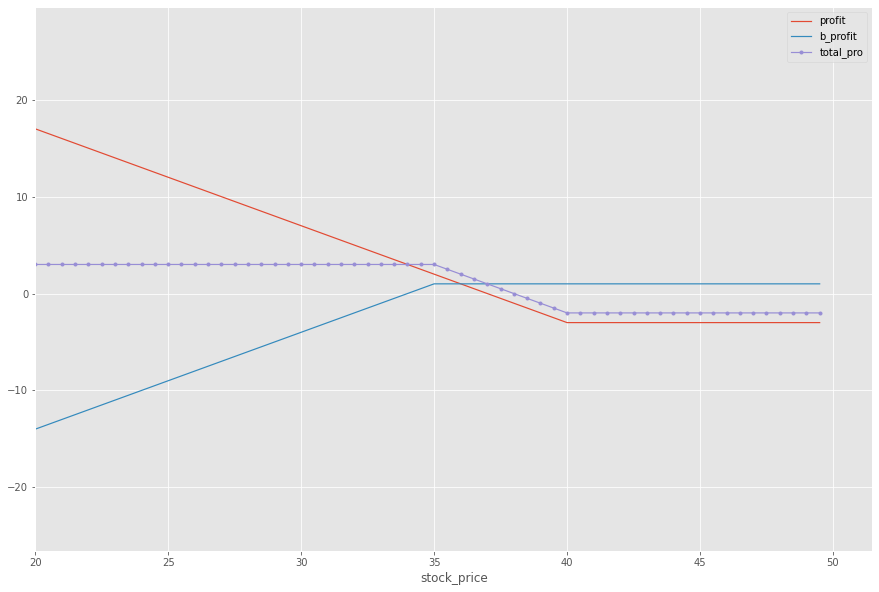

In [159]:
a[['profit', 'b_profit', 'total_pro']].plot(figsize = (15,10), style=['-','-','.-'], linewidth = 1.2, xlim = 20);